In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/StudyData/seeds_dataset.csv',sep='\t')
df.head()

,Area,Perimeter,Compactness,LengthOfKernel,WidthOfKernel,Assymmetry,LengthOfGroove,ClassID
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area            210 non-null    float64
 1   Perimeter       210 non-null    float64
 2   Compactness     210 non-null    float64
 3   LengthOfKernel  210 non-null    float64
 4   WidthOfKernel   210 non-null    float64
 5   Assymmetry      210 non-null    float64
 6   LengthOfGroove  210 non-null    float64
 7   ClassID         210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [ ]:
df.describe()

,Area,Perimeter,Compactness,LengthOfKernel,WidthOfKernel,Assymmetry,LengthOfGroove,ClassID
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [ ]:
df.columns

Index(['Area', 'Perimeter', 'Compactness', 'LengthOfKernel', 'WidthOfKernel',
       'Assymmetry', 'LengthOfGroove', 'ClassID'],
      dtype='object')

In [ ]:
dfX = df[['Perimeter','Assymmetry']]

Pair plot

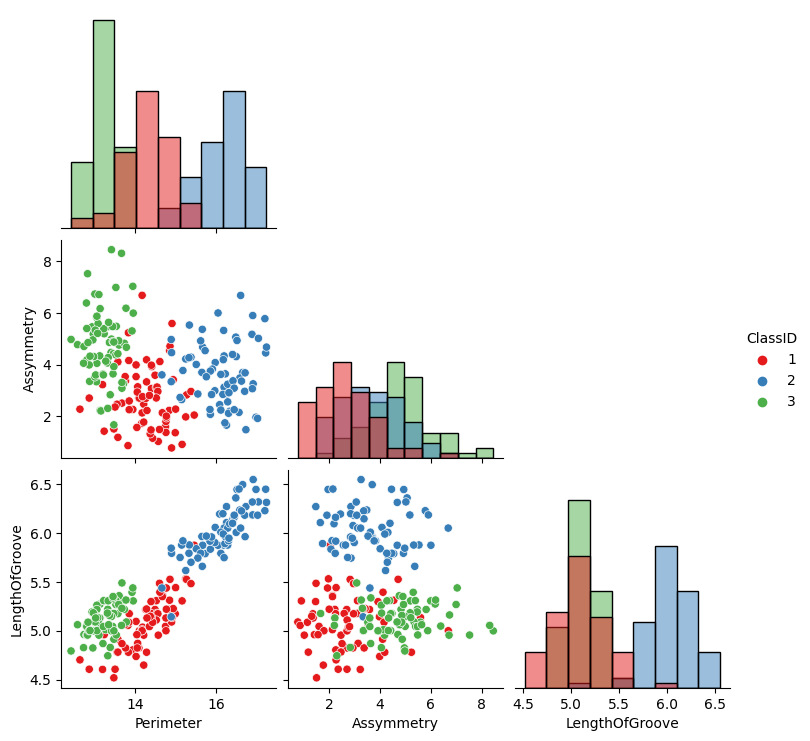

In [ ]:
sns.pairplot(df[['Perimeter','Assymmetry','LengthOfGroove','ClassID']],
             corner = True, hue = 'ClassID',diag_kind='hist',palette='Set1')

In [ ]:
X = dfX.values

Scaling (Z-normalization)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
X_std = min_max_scaler.fit_transform(dfX)#std_scaler.fit_transform(dfX)

Scatter plot (Different Classes). Attributes(Perimeter, Assymmetry) are normalized

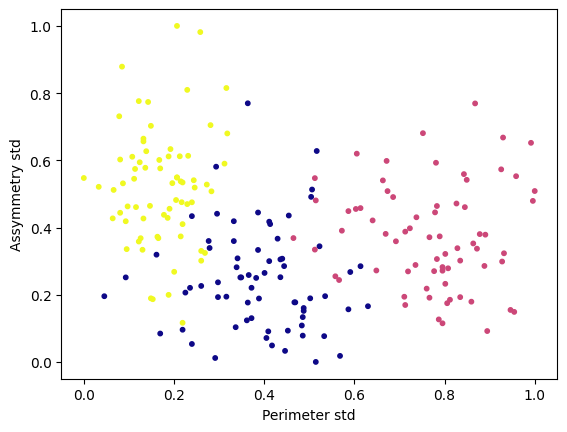

In [ ]:
plt.scatter(X_std[:,0],X_std[:,1],s=10,
            c=df['ClassID'].values,cmap=plt.cm.plasma)
plt.xlabel('Perimeter std')
plt.ylabel('Assymmetry std')
plt.show()

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap

def cluster_2D_visualization(X, labels, axis_names, title_name):
  colors = ['crimson', 'darkgreen', 'navy', 'darkmagenta', 'orange',
            'chartreuse', 'saddlebrown','olive','cyan','royalblue']
  cmap_name = 'my_list'
  cmap =  ListedColormap(name = cmap_name, colors = colors)

  plt.figure(figsize=(5,4))
  plt.scatter(X[:,0], X[:,1], s=10, c=labels, cmap = cmap)
  plt.title(title_name)
  plt.xlabel(axis_names[0])
  plt.ylabel(axis_names[1])
  plt.show()

K-means

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 6, max_iter=500, n_init=1, random_state=5)
y_km = km.fit_predict(X_std)

In [ ]:
X_std.shape

(210, 2)

In [ ]:
y_km.shape

(210,)

In [ ]:
y_km

array([3, 3, 3, 3, 3, 3, 5, 3, 0, 3, 5, 3, 2, 2, 3, 5, 1, 3, 3, 2, 5, 3,
       3, 3, 3, 3, 2, 2, 3, 2, 3, 5, 5, 3, 3, 3, 5, 5, 5, 1, 3, 3, 2, 5,
       5, 3, 3, 5, 3, 3, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2,
       3, 3, 3, 2, 4, 4, 4, 0, 5, 4, 0, 4, 4, 0, 4, 4, 4, 0, 0, 0, 0, 0,
       4, 4, 0, 0, 0, 4, 4, 5, 0, 0, 0, 0, 5, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 4, 0, 4, 0, 0, 0, 4, 0, 5, 0, 5, 4, 4, 0, 0, 4, 0, 0,
       5, 5, 5, 5, 0, 5, 5, 5, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1], dtype=int32)

In [ ]:
import numpy as np
unique_labels = np.unique(y_km)
print(unique_labels)

[0 1 2 3 4 5]


In [ ]:
km.cluster_centers_

array([[0.80355589, 0.26277877],
       [0.18255608, 0.63817783],
       [0.19062377, 0.36022411],
       [0.39997881, 0.14615775],
       [0.81739473, 0.55268719],
       [0.51003542, 0.38992371]])

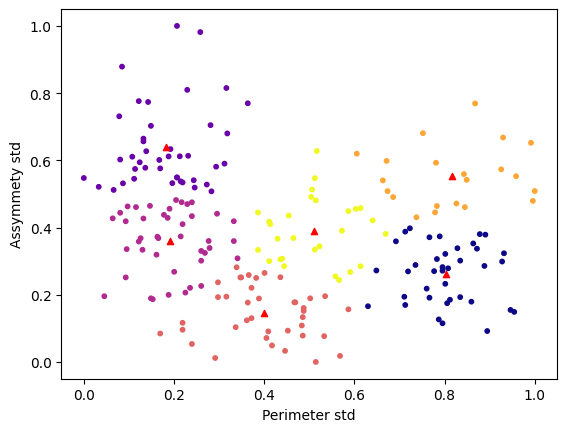

In [ ]:
plt.scatter(X_std[:,0],X_std[:,1],s=10,
            c=y_km,cmap=plt.cm.plasma)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=20,marker='^',
            c='red',label = 'centroids')
plt.xlabel('Perimeter std')
plt.ylabel('Assymmety std')
plt.show()

In [ ]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score

davies_bouldin_sc = davies_bouldin_score(X_std,y_km)
calinski_harabasz_sc = calinski_harabasz_score(X_std,y_km)
silhouette_sc = silhouette_score(X_std,y_km)

print(f'davies bouldin score = {round(davies_bouldin_sc,4)}')
print(f'calinski harabasz score = {round(calinski_harabasz_sc,4)}')
print(f'silhouette_score = {round(silhouette_sc,4)}')

davies bouldin score = 0.8478
calinski harabasz score = 229.7134
silhouette_score = 0.379


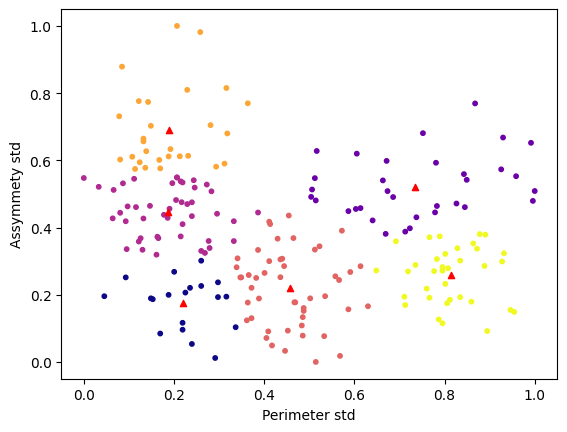

In [ ]:
km = KMeans(n_clusters = 6, max_iter=500, n_init=3, random_state=4)
y_km = km.fit_predict(X_std)
plt.scatter(X_std[:,0],X_std[:,1],s=10,
            c=y_km,cmap=plt.cm.plasma)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=20,marker='^',
            c='red',label = 'centroids')
plt.xlabel('Perimeter std')
plt.ylabel('Assymmety std')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

davies_bouldin_sc = davies_bouldin_score(X_std,y_km)
calinski_harabasz_sc = calinski_harabasz_score(X_std,y_km)
silhouette_sc = silhouette_score(X_std,y_km)

print(f'davies bouldin score = {round(davies_bouldin_sc,4)}')
print(f'calinski harabasz score = {round(calinski_harabasz_sc,4)}')
print(f'silhouette_score = {round(silhouette_sc,4)}')

davies bouldin score = 0.9347
calinski harabasz score = 217.138
silhouette_score = 0.347


davies bouldin score = 0.8478
calinski harabasz score = 229.7134
silhouette_score = 0.379

In [ ]:
k_means_centroids = min_max_scaler.inverse_transform(km.cluster_centers_)#std_scaler.inverse_transform(km.cluster_centers_)
print(k_means_centroids)

[[13.47894737  2.11484737]
 [15.96939394  4.77733333]
 [13.31782609  4.18830435]
 [14.62367347  2.44992041]
 [13.32285714  6.07996429]
 [16.34685714  2.75031429]]


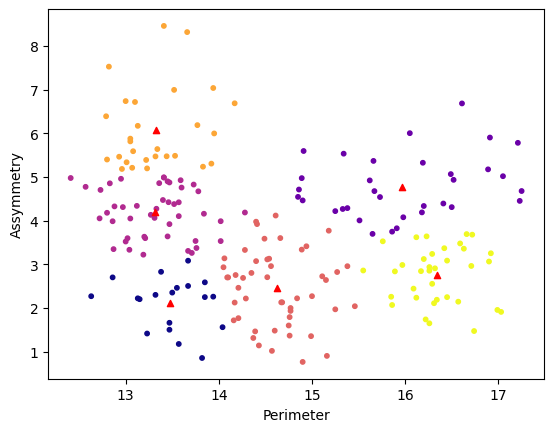

In [ ]:
plt.scatter(X[:,0],X[:,1],s=10,
            c=y_km,cmap=plt.cm.plasma)#c=df['ClassID'].values,cmap=plt.cm.plasma)
plt.scatter(k_means_centroids[:,0],k_means_centroids[:,1],s=20,marker='^',
            c='red',label = 'centroids')
plt.xlabel('Perimeter')
plt.ylabel('Assymmetry')
plt.show()

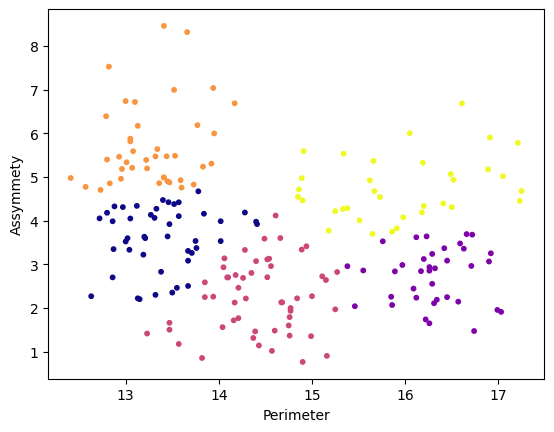

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
k_means_model = KMeans(n_clusters = 5, max_iter=500, n_init=10, random_state=2)
k_means_labels = k_means_model.fit_predict(X_std)

unique_labels = np.unique(k_means_labels)
plt.scatter(X[:,0],X[:,1],s=10, c=k_means_labels, cmap=plt.cm.plasma)
plt.xlabel('Perimeter')
plt.ylabel('Assymmety')
plt.show()

In [ ]:
unique_labels

array([0, 1, 2, 3, 4], dtype=int32)

Silhouette_values

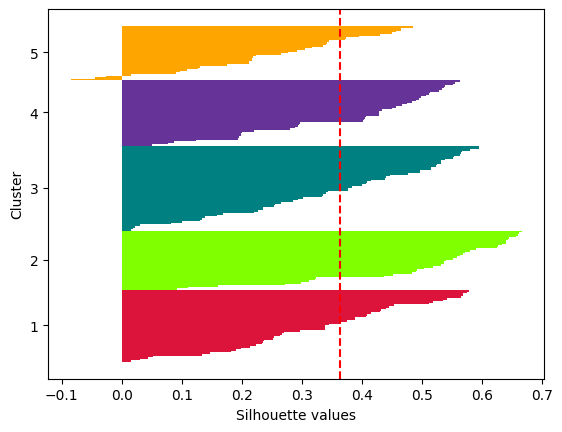

In [ ]:
colors = ['crimson', 'chartreuse', 'teal', 'rebeccapurple', 'orange',
            'fuchsia', 'saddlebrown','lime','cyan','royalblue']
from matplotlib import cm
from sklearn.metrics import silhouette_samples

silhouette_values = silhouette_samples(X_std, k_means_labels, metric='euclidean')
c_silhouette_avg_values = []
y_ax_lower, y_ax_upper = 0, 0
y_ticks = []
for i, c in enumerate(unique_labels):
  c_silhouette_vals = silhouette_values[k_means_labels == c]
  c_silhouette_vals.sort()
  c_silhouette_avg = np.mean(c_silhouette_vals)
  color = colors[i]
  y_ax_upper +=len(c_silhouette_vals)
  plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
           edgecolor='none', color = color)
  y_ticks.append((y_ax_lower + y_ax_upper)/2)
  c_silhouette_avg_values.append(c_silhouette_avg)
  y_ax_lower +=len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_values)
plt.axvline(silhouette_avg, color = 'red', linestyle='--')
plt.yticks(y_ticks, unique_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette values')
plt.show()

In [ ]:
# n = 2 : 0.4480928371268349
# n = 3 : 0.4529679824568832
# n = 4 : 0.4240791931442873
# n = 5 : 0.36342647902032343
silhouette_avg

0.36342647902032343

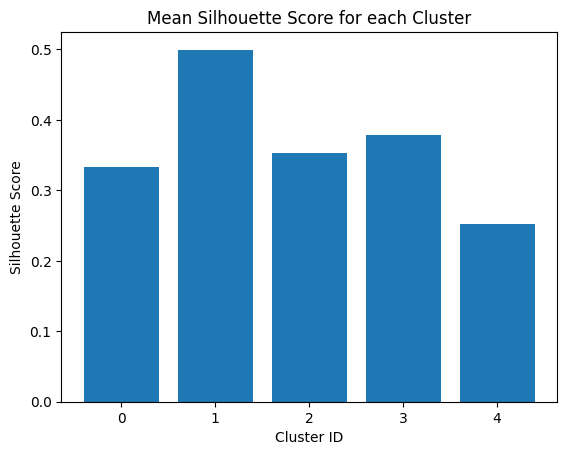

In [ ]:
fig, ax = plt.subplots()
ax.set_xticks(np.arange(0, len(unique_labels), 1))

plt.title('Mean Silhouette Score for each Cluster')
k = np.arange(len(unique_labels),dtype=np.int32)
plt.bar(k, c_silhouette_avg_values)
plt.xlabel('Cluster ID', fontsize = 10)
plt.ylabel('Silhouette Score', fontsize = 10)
plt.show()

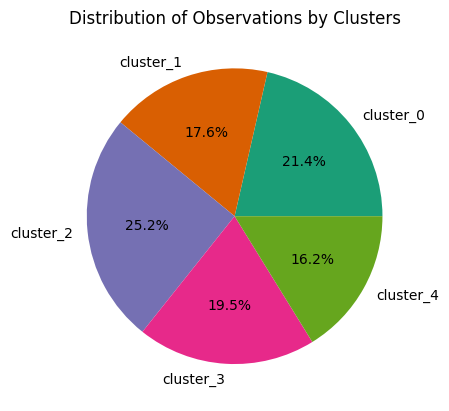

In [ ]:
import seaborn as sns
cluster_names = []
num_of_vectors = []
for i in range(len(unique_labels)):
  cluster_names.append('cluster_'+str(i))
  c_count=silhouette_values[k_means_labels == i]
  num_of_vectors.append(len(c_count))

colors = sns.color_palette('Dark2')
plt.title('Distribution of Observations by Clusters') 
plt.pie(num_of_vectors,labels=cluster_names,colors=colors,autopct='%.1f%%')
plt.show()

In [ ]:
k_means_centroids = min_max_scaler.inverse_transform(k_means_model.cluster_centers_)
print(k_means_centroids)

[[13.39511111  3.60237778]
 [16.29675676  2.73667568]
 [14.43339623  2.23868302]
 [13.28170732  5.69773171]
 [15.94617647  4.74767647]]


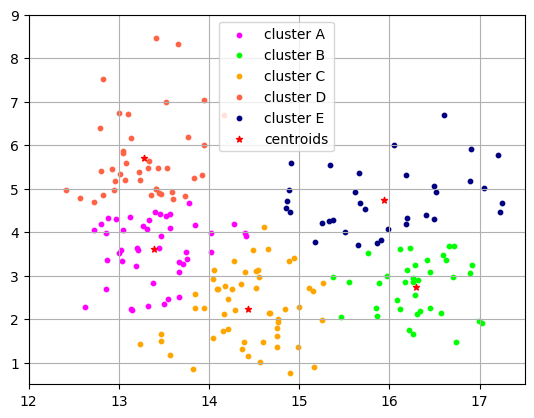

In [ ]:
plt.scatter(X[k_means_labels==0,0],X[k_means_labels==0,1],s=10,c='magenta',label='cluster A')
plt.scatter(X[k_means_labels==1,0],X[k_means_labels==1,1],s=10,c='lime',label='cluster B')
plt.scatter(X[k_means_labels==2,0],X[k_means_labels==2,1],s=10,c='orange',label='cluster C')
plt.scatter(X[k_means_labels==3,0],X[k_means_labels==3,1],s=10,c='tomato',label='cluster D')
plt.scatter(X[k_means_labels==4,0],X[k_means_labels==4,1],s=10,c='navy',label='cluster E')
plt.scatter(k_means_centroids[:,0],k_means_centroids[:,1],s=20,marker='*',
           c='red',label = 'centroids')
plt.xlim((12,17.5))
plt.ylim((0.5,9))
plt.legend()
plt.grid()
plt.show()

K-means. Elbow Method

In [ ]:
sum_of_squared_errors = []
solutions = []
for i in range(1,11):
  km = KMeans(n_clusters = i, max_iter=500, n_init=10, random_state=1)
  km.fit(X_std)
  sum_of_squared_errors.append(km.inertia_)
  solutions.append(km)

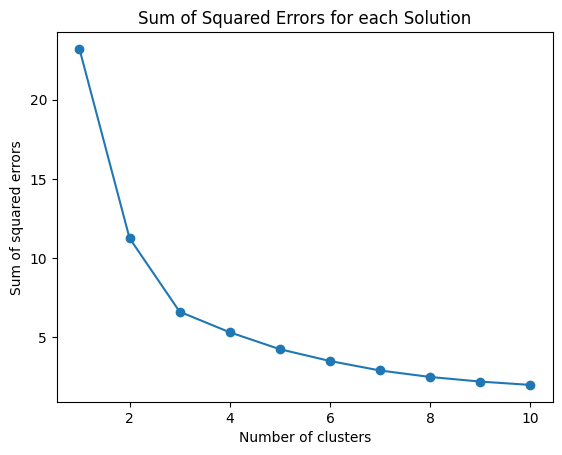

In [ ]:
plt.title('Sum of Squared Errors for each Solution')
plt.plot(range(1,11),sum_of_squared_errors,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
plt.show()

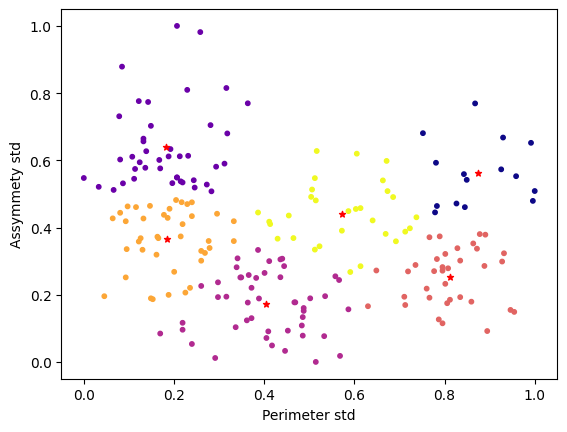

In [ ]:
solution = solutions[5]
k_means_labels = solution.predict(X_std)
plt.scatter(X_std[:,0],X_std[:,1],s=10,
            c=k_means_labels,cmap=plt.cm.plasma)
plt.scatter(solution.cluster_centers_[:,0],solution.cluster_centers_[:,1],
            s=20,marker='*', c='red')
plt.xlabel('Perimeter std')
plt.ylabel('Assymmety std')
plt.show()

DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
eps = 0.03
min_samples = 4
#eps = 0.06
#min_samples = 4
dbscan = DBSCAN(eps=eps,min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(X_std)

In [ ]:
dbscan_labels

array([-1, -1,  2, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0, -1, -1,  3,  2, -1, -1,  0, -1,  1, -1,  2, -1, -1, -1, -1, -1,
        0, -1, -1, -1,  3, -1, -1, -1, -1, -1,  3, -1, -1,  3, -1,  0, -1,
       -1, -1, -1, -1,  0, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  4, -1, -1, -1, -1, -1, -1,  4, -1, -1, -1,
       -1, -1, -1, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  4, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  5,  6, -1, -1,  6,  1,  8, -1, -1,  7,
       -1, -1, -1, -1, -1,  6,  5,  1,  6,  7,  6, -1, -1,  7, -1, -1, -1,
       -1, -1, -1, -1,  8, -1,  8, -1, -1, -1,  8,  7,  7,  8, -1,  6,  7,
        9, -1, -1, -1,  9, -1, -1,  6,  7,  5, -1,  1, -1,  5, -1,  9, -1,
       -1, -1,  9, -1, -1,  5])

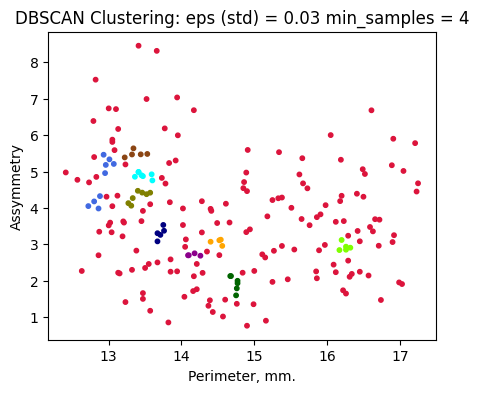

In [ ]:
cluster_2D_visualization(X, dbscan_labels, axis_names = ['Perimeter, mm.','Assymmetry'],
                         title_name=f'DBSCAN Clustering: eps (std) = {eps} min_samples = {min_samples}')

Agglomerative Clustering

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

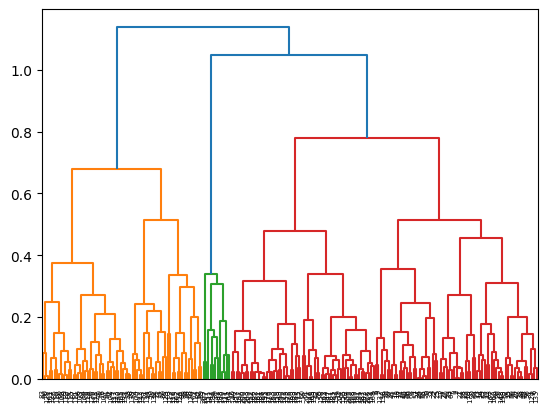

In [ ]:
hierarchical_model = linkage(X_std, method = "complete", metric='euclidean')
dendrogram(hierarchical_model)
plt.show()

In [ ]:
hierarchical_labels = cut_tree(hierarchical_model, n_clusters = 5)

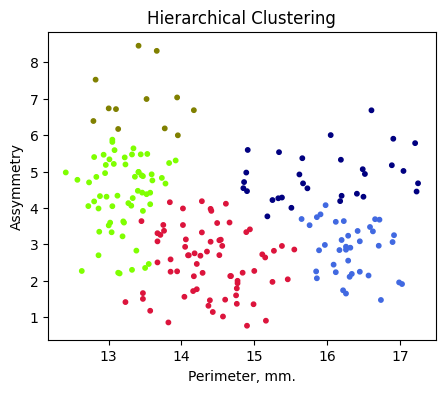

In [ ]:
cluster_2D_visualization(X, hierarchical_labels, axis_names = ['Perimeter, mm.','Assymmetry'],
                         title_name='Hierarchical Clustering')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = 5
agglomerative_model = AgglomerativeClustering(n_clusters = n_clusters, metric = 'euclidean', linkage = 'ward')#
agg_labels = agglomerative_model.fit_predict(X_std)

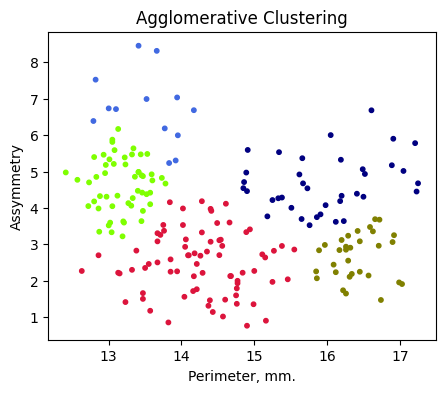

In [ ]:
cluster_2D_visualization(X, agg_labels, axis_names = ['Perimeter, mm.','Assymmetry'],
                         title_name=f'Agglomerative Clustering')

In [ ]:
davies_bouldin_sc = davies_bouldin_score(X_std,agg_labels)
calinski_harabasz_sc = calinski_harabasz_score(X_std,agg_labels)
silhouette_sc = silhouette_score(X_std,agg_labels)

print(f'davies bouldin score = {round(davies_bouldin_sc,4)}')
print(f'calinski harabasz score = {round(calinski_harabasz_sc,4)}')
print(f'silhouette_score = {round(silhouette_sc,4)}')

davies bouldin score = 0.8702
calinski harabasz score = 205.6831
silhouette_score = 0.3737


davies bouldin score = 0.8272
calinski harabasz score = 235.0751
silhouette_score = 0.3852

Gaussian Mixture

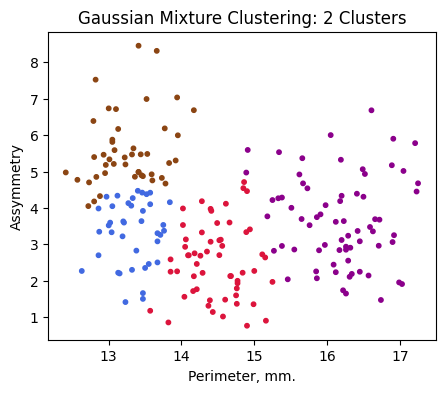

In [ ]:
from sklearn.mixture import GaussianMixture
n_clusters = 4
gmm_model = GaussianMixture(n_components=n_clusters,init_params='kmeans')
gmm_model.fit(X_std)
gmm_labels = gmm_model.predict(X_std)
cluster_2D_visualization(X, gmm_labels, axis_names = ['Perimeter, mm.','Assymmetry'],
                         title_name='Gaussian Mixture Clustering: 2 Clusters')

<ipython-input-54-8ca404e624f6>:10: UserWarning: Log scale: values of z <= 0 have been masked
  CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels = np.logspace(0,3,10))


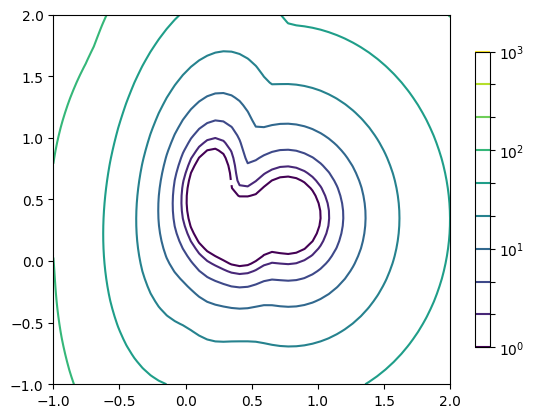

In [ ]:
from matplotlib.colors import LogNorm

x_range = np.linspace(-1, 2)
y_range = np.linspace(-1, 2)
X, Y = np.meshgrid(x_range, y_range)
XX = np.array([X.ravel(),Y.ravel()]).T
Z = -gmm_model.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels = np.logspace(0,3,10))
CB = plt.colorbar(CS, shrink=0.8, extend = 'both')
plt.xlim((-1,2))
plt.ylim((-1,2))
plt.show()